# Preprocessing, Training, & Modeling

## Table of Contents<a id='Table_of_Contents'></a>
* [1 Processing, Training, & Modeling](#1_Processing_,_Training_,_Modeling)
    * [1.1 Table of Contents](#1.1_Table_of_Contents)
    * [1.2 Imports](#1.2_Imports)
    * [1.3 Load Data](#1.3_Load_Data)
    * [1.4 Feature Engineering](#1.4_Feature_Engineering)
    * [1.5 Model Building](#1.5_Model_Building) 
        * [1.5.1 Random Forest](#1.5.1_Random_Forest)
            * [1.5.1.1 Hyperparameter Tuning RF](#1.5.1.1_Hyperparameter_Tuning_RF)
        * [1.5.2 Gradient Boosting](#1.5.2_Gradient_Boosting)
            * [1.5.2.1 Hyperparameter Tuning GB](#1.5.2.1_Hyperparameter_Tuning_GB)
        * [1.5.3 XGBoost](#1.5.3_XGBoost)
            * [1.5.3.1 Hyperparameter Tuning XGB](#1.5.3.1_Hyperparamter_Tuning_XGB)

**Predicting on the Ratings** 

## Imports<a id='1.2_Imports'></a>

In [1]:
#call all import statements and their necessary pacakges
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## Load Data<a id='1.3_Imports'></a>

In [2]:
movies = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/TMDB-Movie-Ratings/data/movies_cleaned.csv')
ratings = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/TMDB-Movie-Ratings/data/ratings_cleaned.csv')

The motivation behind combining these two datasets is to be able to understand which features play a key role in predicting the rating of a film to a certain degree. 

In [3]:
combined_df = pd.merge(movies,ratings, on ='id', how='left')

In [4]:
combined_df.info()           

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183206 entries, 0 to 1183205
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   adult                  1183206 non-null  bool   
 1   belongs_to_collection  275952 non-null   object 
 2   budget                 1183206 non-null  float64
 3   genres                 1183206 non-null  object 
 4   homepage               281360 non-null   object 
 5   id                     1183206 non-null  int64  
 6   imdb_id                1183180 non-null  object 
 7   original_language      1183193 non-null  object 
 8   original_title         1183206 non-null  object 
 9   overview               1178266 non-null  object 
 10  popularity             1183206 non-null  float64
 11  poster_path            1181842 non-null  object 
 12  production_companies   1183206 non-null  object 
 13  production_countries   1183206 non-null  object 
 14  release_date      

In [5]:
combined_df.shape

(1183206, 30)

In [6]:
combined_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,day,month,num_genres,userId,rating
count,1.183206e+06,1.183206e+06,1.183206e+06,1.183206e+06,1.182867e+06,1.183206e+06,1.183206e+06,1.182404e+06,1.182404e+06,1.182404e+06,1.183206e+06,1.143571e+06,1.143571e+06
mean,1.912366e+07,1.079739e+04,7.854956e+00,7.237566e+07,1.080995e+02,6.584738e+00,6.413840e+02,1.987447e+03,1.518177e+01,6.932811e+00,2.409820e+00,1.347564e+04,7.062312e+00
std,3.731519e+07,3.423603e+04,6.648255e+00,1.727673e+08,2.598008e+01,1.125276e+00,1.201326e+03,2.156605e+01,9.149474e+00,3.533301e+00,1.057717e+00,7.803694e+03,2.120801e+00
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.874000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,5.090000e+02,2.686234e+00,0.000000e+00,9.400000e+01,6.100000e+00,2.500000e+01,1.975000e+03,7.000000e+00,4.000000e+00,2.000000e+00,6.672000e+03,6.000000e+00
50%,1.073000e+06,1.580000e+03,7.274948e+00,1.108462e+06,1.050000e+02,6.800000e+00,1.470000e+02,1.996000e+03,1.500000e+01,7.000000e+00,2.000000e+00,1.338700e+04,8.000000e+00
75%,2.200000e+07,3.396000e+03,1.126747e+01,6.867323e+07,1.200000e+02,7.300000e+00,6.300000e+02,2.004000e+03,2.300000e+01,1.000000e+01,3.000000e+00,2.028400e+04,8.000000e+00
max,3.800000e+08,4.691720e+05,5.474883e+02,2.787965e+09,1.256000e+03,1.000000e+01,1.407500e+04,2.020000e+03,3.100000e+01,1.200000e+01,8.000000e+00,2.704700e+04,1.000000e+01


In [7]:
combined_df['id'].value_counts()

318      9231
296      8764
593      8451
260      7747
480      7521
         ... 
38510       1
48747       1
42600       1
56935       1
40471       1
Name: id, Length: 45430, dtype: int64

In [8]:
combined_df.groupby(by='original_title')['rating'].count().sort_values(ascending=False).head(10)

original_title
The Million Dollar Hotel              9231
Terminator 3: Rise of the Machines    8764
Солярис                               8451
The 39 Steps                          7747
Monsoon Wedding                       7521
Once Were Warriors                    6853
Trois couleurs : Rouge                6639
License to Wed                        6056
La passion de Jeanne d'Arc            5783
48 Hrs.                               5774
Name: rating, dtype: int64

In [9]:
combined_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    907254
homepage                 901846
tagline                  371458
timestamp                 39635
userId                    39635
rating                    39635
overview                   4940
poster_path                1364
release_date                802
month                       802
year                        802
day                         802
runtime                     339
status                      150
imdb_id                      26
original_language            13
video                         0
num_genres                    0
budget                        0
genres                        0
id                            0
popularity                    0
original_title                0
vote_average                  0
production_companies          0
production_countries          0
vote_count                    0
revenue                       0
spoken_languages              0
adult                         0
dtype: int64

In [10]:
combined_df[combined_df['rating'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,day,month,num_genres,userId,rating,timestamp
45,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"['Romance', 'Comedy']",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,1995.0,22.0,12.0,2,NaN,NaN,NaN
46,False,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,1995.0,22.0,12.0,3,NaN,NaN,NaN
47,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,['Comedy'],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,1995.0,10.0,2.0,1,NaN,NaN,NaN
269,False,NaN,58000000.0,"['Comedy', 'Romance']",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,False,6.2,141.0,1995.0,15.0,12.0,2,NaN,NaN,NaN
270,False,NaN,0.0,"['Action', 'Adventure', 'Drama', 'Family']",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,False,5.4,45.0,1995.0,22.0,12.0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183200,False,NaN,0.0,"['Drama', 'Action', 'Romance']",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,False,5.7,26.0,1991.0,13.0,5.0,3,NaN,NaN,NaN
1183201,False,NaN,0.0,"['Drama', 'Family']",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,False,4.0,1.0,NaN,NaN,NaN,2,NaN,NaN,NaN
1183203,False,NaN,0.0,"['Action', 'Drama', 'Thriller']",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,False,3.8,6.0,2003.0,1.0,8.0,3,NaN,NaN,NaN
1183204,False,NaN,0.0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,False,0.0,0.0,1917.0,21.0,10.0,0,NaN,NaN,NaN


In [11]:
combined_df['status'].value_counts()

Released           1180955
Rumored               1876
Post Production        146
In Production           62
Planned                 15
Canceled                 2
Name: status, dtype: int64

In [12]:
combined_df = combined_df.dropna(subset=['year','month','day','rating'])

In [13]:
model_df = combined_df.drop(['tagline', 'overview', 'poster_path', 
                               'imdb_id', 'id', 'userId', 'video', 'release_date', 'status','timestamp'], axis = 1)

In [14]:
#fill_cols = ['belongs_to_collection', 'homepage', 'tagline', 'overview', 'poster_path', 
#             'original_language', 'status', 'imdb_id', 'release_date']
#for col in fill_cols:
#    combined_df[col].fillna(' ', inplace=True)

In [15]:
model_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    870552
homepage                 868936
runtime                      91
original_language             3
rating                        0
production_companies          0
budget                        0
genres                        0
original_title                0
popularity                    0
production_countries          0
num_genres                    0
revenue                       0
spoken_languages              0
vote_average                  0
vote_count                    0
year                          0
day                           0
month                         0
adult                         0
dtype: int64

In [16]:
#combined_df['runtime'].fillna(combined_df['runtime'].mean(), inplace=True)

In [17]:
#cols_fill = ['year', 'month', 'day']
#for col in cols_fill:
#    combined_df[col] = combined_df[col].fillna(combined_df[col].mean())

In [18]:
combined_df['rating'].value_counts().head(10)

8.0     313827
6.0     258086
10.0    177612
7.0     115695
4.0      81467
9.0      80798
5.0      47032
2.0      39270
3.0      14859
1.0      14204
Name: rating, dtype: int64

In [19]:
combined_df['id'].nunique()

5792

In [20]:
combined_df['userId'].nunique()

26543

In [21]:
#combined_df['userId'] = combined_df['userId'].astype(int)

In [22]:
combined_df['userId'].value_counts().head(10)

8659.0     3022
24025.0    1346
3437.0     1092
25808.0    1059
5829.0     1059
5620.0     1024
13839.0    1003
19580.0     998
6513.0      974
17211.0     973
Name: userId, dtype: int64

In [23]:
combined_df.groupby('original_title')['rating'].mean().reset_index(name= 'rating')

,original_title,rating
0,!Women Art Revolution,6.119565
1,$5 a Day,4.888889
2,'Gator Bait,7.047619
3,'R Xmas,6.600000
4,'Twas the Night Before Christmas,7.512195
...,...,...
5709,헬로우 고스트,6.588235
5710,형사 Duelist,7.000000
5711,활,7.714894
5712,회사원,7.000000


In [24]:
ratings_df = pd.DataFrame(combined_df.groupby('original_title')['rating'].mean())  
  
ratings_df['num_ratings'] = pd.DataFrame(combined_df.groupby('original_title')['rating'].count()) 
  
ratings_df.sort_values(by='num_ratings', ascending=False).head(10) 

,rating,num_ratings
original_title,,
The Million Dollar Hotel,8.833604,9231
Terminator 3: Rise of the Machines,8.370379,8764
Солярис,8.298545,8451
The 39 Steps,8.243449,7747
Monsoon Wedding,7.305544,7521
Once Were Warriors,8.508099,6853
Trois couleurs : Rouge,8.023949,6639
License to Wed,8.448151,6056
La passion de Jeanne d'Arc,6.774511,5783


In [25]:
return_df = pd.DataFrame(combined_df.groupby('original_title')[['budget', 'revenue']].mean())
return_df['profit'] = return_df['revenue'] - return_df['budget']
return_df.sort_values(by='profit', ascending=False)[0:9]

,budget,revenue,profit
original_title,,,
Titanic,1.469177e+08,1.321298e+09,1.174380e+09
Avengers: Age of Ultron,2.800000e+08,1.405404e+09,1.125404e+09
The Lord of the Rings: The Return of the King,9.400000e+07,1.118889e+09,1.024889e+09
Pirates of the Caribbean: Dead Man's Chest,2.000000e+08,1.065660e+09,8.656598e+08
Jurassic Park,6.300000e+07,9.201000e+08,8.571000e+08
Harry Potter and the Philosopher's Stone,1.250000e+08,9.764756e+08,8.514756e+08
The Lord of the Rings: The Two Towers,7.900000e+07,9.262874e+08,8.472874e+08
Finding Nemo,9.400000e+07,9.403355e+08,8.463355e+08
The Dark Knight,1.850000e+08,1.004558e+09,8.195584e+08


C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


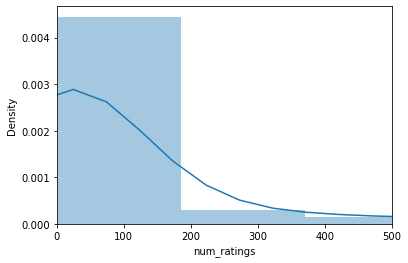

In [26]:
_ = sns.distplot(ratings_df['num_ratings'])
_ = plt.xlim([0,500])
plt.show()

C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


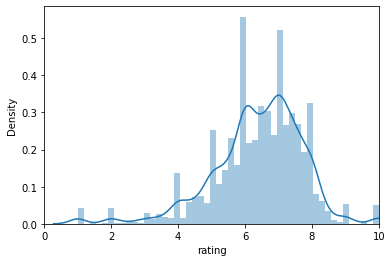

In [27]:
_ = sns.distplot(ratings_df['rating'])
_ = plt.xlim([0,10])
plt.show()

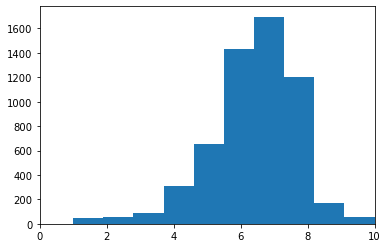

In [28]:
_ = plt.hist(ratings_df['rating'], bins=10)
_ = plt.xlim([0,10])
plt.show()

After doing some quick exploration, ending with a heatmap because it helps show the relationship between each variable in the dataset.

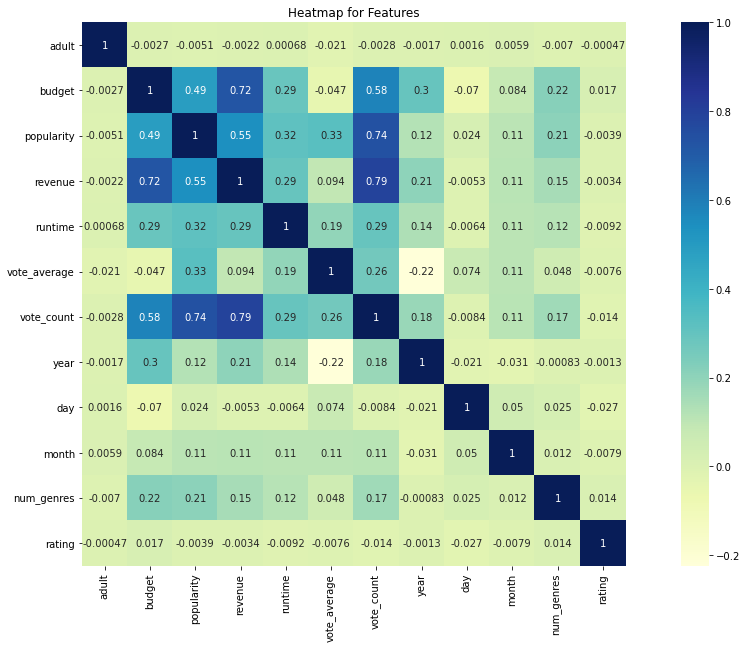

In [29]:
_ = plt.figure(figsize=(20,10))
_ = sns.heatmap(model_df.corr(), square=True, cmap="YlGnBu", annot=True)
_ = plt.title("Heatmap for Features")
plt.show()

In [30]:
model_df.dtypes

adult                       bool
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
original_language         object
original_title            object
popularity               float64
production_companies      object
production_countries      object
revenue                  float64
runtime                  float64
spoken_languages          object
vote_average             float64
vote_count               float64
year                     float64
day                      float64
month                    float64
num_genres                 int64
rating                   float64
dtype: object

In [31]:
model_df['original_language'].fillna('', inplace=True)

In [32]:
#model_df = model_df.dropna(['rating','month', 'day', 'year'])

In [33]:
model_df.isnull().sum()

adult                         0
belongs_to_collection    870552
budget                        0
genres                        0
homepage                 868936
original_language             0
original_title                0
popularity                    0
production_companies          0
production_countries          0
revenue                       0
runtime                      91
spoken_languages              0
vote_average                  0
vote_count                    0
year                          0
day                           0
month                         0
num_genres                    0
rating                        0
dtype: int64

In [34]:
zeros = pd.concat([(model_df == 0).astype(int).sum(axis=0), 100 * (model_df == 0).astype(int).mean(axis=0)], axis=1)
zeros.columns=['count', '% of 0s']
zeros.sort_values(by='% of 0s', ascending = False)

,count,% of 0s
adult,1142820,99.997375
revenue,528494,46.243514
budget,504085,44.107713
vote_average,6639,0.580916
vote_count,5103,0.446515
num_genres,4788,0.418953
runtime,2087,0.182614
popularity,1,0.000088
production_companies,0,0.000000
production_countries,0,0.000000


In [35]:
def total_nums(df, genre): 
    """
    @params: dataframe, column (in this situation genre)
    @output: number of ratings of films that contains a specific genre
    """
    pattern = [genre] 
    jk= '|'.join(pattern)
    return df.genres.str.contains(jk).sum()

In [36]:
def contains_genre(df, genre):
    """
    @params: dataframe, column (in this situation genre)
    @output: a feature used for modeling
    """
    pattern = [genre] 
    jk= '|'.join(pattern)
    df['is_' + str(genre)] = df.genres.str.contains(jk).astype(int)
    return df['is_' + str(genre)]

In [37]:
model_df.genres.value_counts().sort_values(ascending=False).head(10)

['Drama']                         126664
['Comedy']                         50701
['Drama', 'Romance']               41699
['Comedy', 'Drama', 'Romance']     38080
['Comedy', 'Drama']                32820
['Drama', 'Thriller']              21889
['Drama', 'History']               18696
['Comedy', 'Romance']              18223
['Crime', 'Drama']                 17331
['Horror']                         16171
Name: genres, dtype: int64

In [38]:
cols = ['Science Fiction', 'Western', 'Drama', 'Romance', 'Comedy', 'Thriller', 'Horror', 
        'Crime', 'Family', 'Action', 'Adventure', 'Fantasy']
for col in cols:
    print(col + ': ', total_nums(model_df,col))

Science Fiction:  138751
Western:  26287
Drama:  659031
Romance:  210300
Comedy:  324476
Thriller:  290268
Horror:  92486
Crime:  196502
Family:  58157
Action:  226776
Adventure:  159896
Fantasy:  85903


In [39]:
model_df['production_companies']

0          ['Pixar Animation Studios']
1          ['Pixar Animation Studios']
2          ['Pixar Animation Studios']
3          ['Pixar Animation Studios']
4          ['Pixar Animation Studios']
                      ...             
1183187          ['Star Film Company']
1183188          ['Star Film Company']
1183189          ['Star Film Company']
1183190          ['Star Film Company']
1183202                ['Sine Olivia']
Name: production_companies, Length: 1142850, dtype: object

## Feature Engineering<a id='1.4_Feature_Engineering'></a>

Feature Engineering Tasks:  
- **is_" "** : boolean variable, indicates 1 if the rating contains one of the most popular genres otherwise 0  
- **original_language**: turned into a binary feature, indicates 1 if the film was originally shot in english otherwise 0  
- **is_Summer**: boolean variable, indicates 1 if the release date month  of film falls during the summer time (May-September)    
- **runtime**: imputed null values with mean

In [40]:
def feat_eng(df):
    
    #df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda b: 0 if b == np.nan else 1)
    #df['homepage'] = df['homepage'].apply(lambda b: 0 if b == np.nan else 1)
    genres = ['Drama', 'Comedy', 'Thriller']
    for genre in genres:
        df['is_' + str(genre)] = contains_genre(df, genre)
    
    df['original_language'] = df['original_language'].apply(lambda l: 1 if l == 'en' else 0)
    
    #df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    #df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Summer'] = df['month'].apply(lambda x: 1 if x in [5.0,6.0,7.0,8.0,9.0] else 0)
    
    #df['spoken_languages'] = df['spoken_languages'].apply(lambda s: 1 if s == 'English' else 0)
    df['runtime'] = df['runtime'].fillna(combined_df['runtime'].mean())
    df = df.drop(['original_title', 'adult','genres', 'homepage', 'belongs_to_collection', 
                  'production_companies', 'production_countries','spoken_languages'], axis=1)
    return df

This function one hot encodes columns production companies and production countries. After performing pd.get_dummies(), only keeping the top 10 best performing combinations as features for the models.

In [41]:
def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable + "_" + label] = np.where(small_df[variable] == label, 1,0) 

In [42]:
type(model_df)

pandas.core.frame.DataFrame

In [43]:
print("shape of the dataset: ", model_df.shape)

shape of the dataset:  (1142850, 20)


## Model Building<a id='1.5_Model_Building'></a>

In [44]:
model_df = model_df[(model_df.revenue >0) & (model_df.budget >0) & (model_df.vote_count > 0) & (model_df.runtime >0)]

In [45]:
small_df = model_df.sample(frac = 0.01, axis=0)

In [46]:
small_df.shape

(5421, 20)

In [47]:
type(small_df)

pandas.core.frame.DataFrame

In [48]:
def change(col):
    print(col)
    if not col:
        return "missing"
    return "_".join(col)
#if-else

In [49]:
#small_df['production_companies'] = small_df['production_companies'].apply(change)

In [50]:
# one hot encode these two columns for better results
pd.get_dummies(data=small_df, columns = ['production_companies', 'production_countries'],dtype=float)

,adult,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,revenue,runtime,...,"production_countries_['United States of America', 'Germany']","production_countries_['United States of America', 'Hong Kong', 'United Kingdom']","production_countries_['United States of America', 'India', 'France']","production_countries_['United States of America', 'Morocco']","production_countries_['United States of America', 'Spain']","production_countries_['United States of America', 'United Kingdom', 'France']","production_countries_['United States of America', 'United Kingdom', 'Romania', 'Italy']","production_countries_['United States of America', 'United Kingdom']",production_countries_['United States of America'],"production_countries_['Uruguay', 'United States of America', 'Germany', 'Paraguay']"
979949,False,NaN,26000000.0,"['Drama', 'Thriller', 'War']",NaN,en,Brothers,9.108917,43318349.0,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
657227,False,NaN,6400000.0,"['Drama', 'Thriller', 'Crime', 'Romance']",http://www.sonyclassics.com/youngadam/,en,Young Adam,5.235419,2500000.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389904,False,"{'id': 495, 'name': 'Shaft Collection', 'poste...",2142000.0,"['Adventure', 'Action', 'Thriller', 'Crime', '...",NaN,en,Shaft in Africa,1.424722,1458000.0,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
627943,False,NaN,140000000.0,"['Drama', 'Action', 'War', 'History']",NaN,en,The Last Samurai,19.582325,456758981.0,154.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
848207,False,NaN,40000000.0,"['Drama', 'Mystery', 'Thriller']",http://wwws.warnerbros.de/theprestige/,en,The Prestige,16.945560,109676311.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159109,False,"{'id': 151, 'name': 'Star Trek: The Original S...",30000000.0,"['Science Fiction', 'Action', 'Adventure', 'Th...",NaN,en,Star Trek V: The Final Frontier,12.308007,70200000.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
550987,False,NaN,3500159.0,"['Comedy', 'Drama', 'Romance']",http://www2.foxsearchlight.com/benditlikebeckham/,en,Bend It Like Beckham,6.262677,76578641.0,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187755,False,NaN,15000000.0,['Drama'],NaN,en,Boogie Nights,7.595679,43101594.0,155.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
404521,False,NaN,5000000.0,"['Drama', 'Comedy', 'Music']",NaN,en,Billy Elliot,12.158424,110000000.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
small_df.production_companies.value_counts().sort_values(ascending=False).head(20)

['Paramount Pictures']                                                                                                                                                          160
['Universal Pictures']                                                                                                                                                           83
['PolyGram Filmed Entertainment', 'Warner Bros.']                                                                                                                                74
['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions']     69
['Paramount Pictures', 'The Coppola Company', 'The Directors Company']                                                                                                           67
['United Artists', 'Star Partners II Ltd.']                                                         

In [52]:
small_df.production_countries.value_counts().sort_values(ascending=False)

['United States of America']                                                         3543
['United Kingdom', 'United States of America']                                        411
['Germany', 'United States of America']                                               158
['United Kingdom']                                                                    115
['Australia', 'United States of America']                                              75
                                                                                     ... 
['Canada', 'United Kingdom', 'United States of America', 'Italy', 'South Africa']       1
['Austria', 'France']                                                                   1
['United States of America', 'Germany', 'Japan', 'United Kingdom']                      1
['Australia', 'United Kingdom', 'United States of America']                             1
['Ireland', 'Luxembourg', 'Russia', 'United Kingdom', 'United States of America']       1
Name: prod

Here, the top 10 popular combinations of the production_companies and production_countries are chosen to be put in the model to help predict ratings. This will be used as a parameter for the function. 

In [53]:
# encode the top 10 most frequent
top_10_comp = [x for x in small_df.production_companies.value_counts().sort_values(ascending=False).head(10).index]
top_10_count = [x for x in small_df.production_countries.value_counts().sort_values(ascending=False).head(10).index]

In [54]:
top_10_comp

["['Paramount Pictures']",
 "['Universal Pictures']",
 "['PolyGram Filmed Entertainment', 'Warner Bros.']",
 "['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions']",
 "['Paramount Pictures', 'The Coppola Company', 'The Directors Company']",
 "['United Artists', 'Star Partners II Ltd.']",
 "['TriStar Pictures']",
 "['Village Roadshow Pictures', 'Robert Simonds Productions', 'Warner Bros.', 'Phoenix Pictures', 'Underground', 'Proposal Productions']",
 "['United Artists']",
 "['Universal Pictures', 'Amblin Entertainment', 'U-Drive Productions']"]

In [55]:
top_10_count

["['United States of America']",
 "['United Kingdom', 'United States of America']",
 "['Germany', 'United States of America']",
 "['United Kingdom']",
 "['Australia', 'United States of America']",
 "['France', 'United States of America']",
 "['Germany', 'United Kingdom', 'United States of America']",
 "['Japan', 'United States of America']",
 "['Germany']",
 "['United States of America', 'United Kingdom']"]

In [56]:
one_hot_top_x(small_df, 'production_companies', top_10_comp)

In [57]:
one_hot_top_x(small_df, 'production_countries', top_10_count)

In [58]:
small_df.shape

(5421, 40)

In [59]:
len(small_df.production_companies)

5421

In [60]:
X,y=small_df.drop(['rating'], axis=1), small_df['rating']

In [61]:
X = feat_eng(X)

In [62]:
type(X)

pandas.core.frame.DataFrame

In [63]:
X.shape

(5421, 35)

In [64]:
X.head()

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,year,day,month,...,"production_countries_['Australia', 'United States of America']","production_countries_['France', 'United States of America']","production_countries_['Germany', 'United Kingdom', 'United States of America']","production_countries_['Japan', 'United States of America']",production_countries_['Germany'],"production_countries_['United States of America', 'United Kingdom']",is_Drama,is_Comedy,is_Thriller,is_Summer
979949,26000000.0,1,9.108917,43318349.0,104.0,6.8,650.0,2009.0,27.0,1.0,...,0,0,0,0,0,0,1,0,1,0
657227,6400000.0,1,5.235419,2500000.0,93.0,5.9,46.0,2003.0,26.0,9.0,...,0,0,0,0,0,0,1,0,1,1
389904,2142000.0,1,1.424722,1458000.0,112.0,5.4,6.0,1973.0,14.0,6.0,...,0,0,0,0,0,0,0,0,1,1
627943,140000000.0,1,19.582325,456758981.0,154.0,7.3,1946.0,2003.0,5.0,12.0,...,0,0,0,0,0,0,1,0,0,0
848207,40000000.0,1,16.945560,109676311.0,130.0,8.0,4510.0,2006.0,19.0,10.0,...,0,0,0,0,0,0,1,0,1,0


In [65]:
X.original_language.value_counts()

1    5060
0     361
Name: original_language, dtype: int64

### Random Forest<a id='1.5.1_Random_Forest'></a>

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 241)

In [67]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(random_state = 241)
rf_model.fit(X_train,y_train)

print("R^2 Training Score: {:.3f}".format(rf_model.score(X_train, y_train)))
print('score on test set: {:.3f}'.format(rf_model.score(X_test, y_test)))

for name, importance in zip(X_train.columns, rf_model.feature_importances_):
    print(name, "=", importance)

R^2 Training Score: 0.293
score on test set: 0.062
budget = 0.09668493694300889
original_language = 0.006008338476334834
popularity = 0.10336992868241261
revenue = 0.10611067416711474
runtime = 0.09928652073277087
vote_average = 0.0872635895653433
vote_count = 0.1049976732618571
year = 0.09045283683747467
day = 0.092200273260665
month = 0.05743650911222364
num_genres = 0.038522925654217444
production_companies_['Paramount Pictures'] = 0.009204702535515362
production_companies_['Universal Pictures'] = 0.0028341210479559
production_companies_['PolyGram Filmed Entertainment', 'Warner Bros.'] = 0.0019686986062076943
production_companies_['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions'] = 5.448088821127434e-05
production_companies_['Paramount Pictures', 'The Coppola Company', 'The Directors Company'] = 3.1843435256576434e-05
production_companies_['United Artists', 'Star

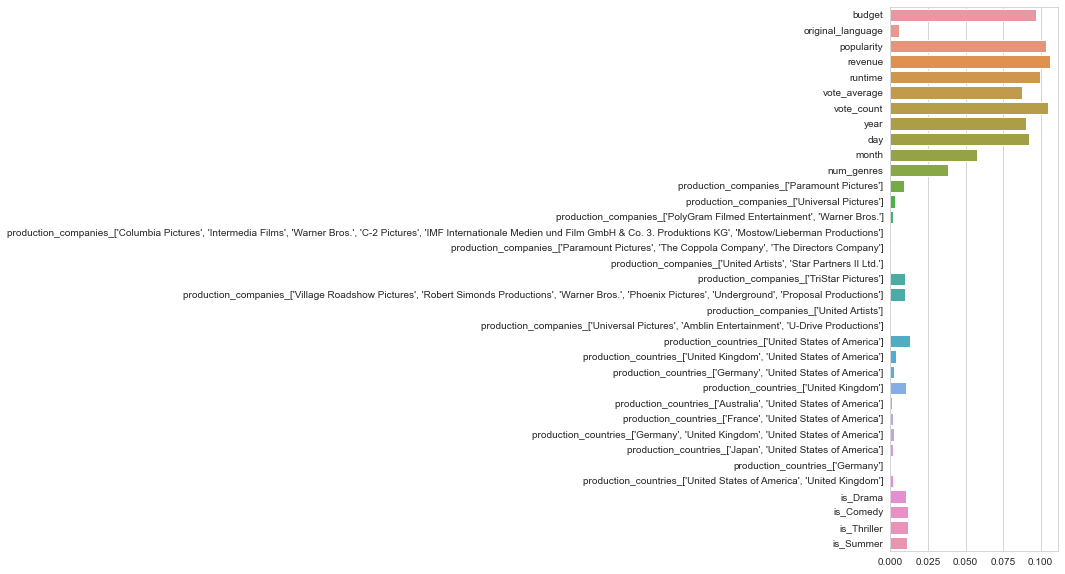

In [68]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,10))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)

In [69]:
np.unique(y_test, return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([  8,  46,  22,  83,  46, 322, 126, 383,  90, 230], dtype=int64))

In [70]:
y_pred = rf_model.predict(X_test)

In [71]:
print(y_pred[:10])

[8.11509436 5.76658586 7.64509803 6.37644183 7.86867847 6.69952886
 5.83321551 7.44804667 7.16964226 6.87174163]


In [72]:
print(X_train.shape, X_test.shape)

(4065, 35) (1356, 35)


In [73]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

evc_rf = explained_variance_score(y_test, y_pred)
print("The explained variance score of this model is: ", evc_rf)

mae_rf = mean_absolute_error(y_test, y_pred)
print("The mean absolute error of this model is: ", mae_rf)

mse_rf = mean_squared_error(y_test, y_pred)
print("The mean squared error of this model is: ", mse_rf)

msle_rf = mean_squared_log_error(y_test, y_pred)
print("The mean squared log error of this model is: ",msle_rf)

med_rf = median_absolute_error(y_test, y_pred)
print("the median absolute error of this model is: ", med_rf)

r2_rf = r2_score(y_test, y_pred, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_rf)

The explained variance score of this model is:  0.0631360439302977
The mean absolute error of this model is:  1.5773686401333342
The mean squared error of this model is:  4.026693856355013
The mean squared log error of this model is:  0.09009617842022119
the median absolute error of this model is:  1.2861746781425127
The r2 score of this model is:  0.06166014140203091


In [74]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE for RF: %f' % (rmse_rf))

RMSE for RF: 2.006662


In [75]:
scores = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final RMSE: ", final_avg_rmse)

Final RMSE:  2.034298314658205


#### Hyperparamter Tuning RF<a id='1.5.1.1_Hyperparameter_Tuning_RF'></a>

In [76]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [50,100,500],
               'max_depth': [5,10,20],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4], 
               'bootstrap': [True]}
rf_random = RandomizedSearchCV(rf_model,random_grid,n_iter=100,cv=5,verbose=1,random_state=241,n_jobs=-1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\sathw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  9.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=241),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 500]},
                   random_state=241, verbose=1)

In [77]:
ypred_rf = rf_random.predict(X_test)
print(ypred_rf[:10])

[7.79048602 6.34347388 7.41378016 6.44234135 7.56445935 6.97260276
 6.51461311 6.92161053 7.2124471  7.00456101]


In [78]:
print(rf_random.best_params_)

{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}


In [79]:
print("lowest RMSE found: ", np.sqrt(np.abs(rf_random.best_score_)))

lowest RMSE found:  0.2490891472908267


In [80]:
evc_rf_t = explained_variance_score(y_test, ypred_rf)
print("The explained variance score of this model is: ", evc_rf_t)

mae_rf_t = mean_absolute_error(y_test, ypred_rf)
print("The mean absolute error of this model is: ", mae_rf_t)

mse_rf_t = mean_squared_error(y_test, ypred_rf)
print("The mean squared error of this model is: ", mse_rf_t)

msle_rf_t = mean_squared_log_error(y_test, ypred_rf)
print("The mean squared log error of this model is: ",msle_rf_t)

med_rf_t = median_absolute_error(y_test, ypred_rf)
print("the median absolute error of this model is: ", med_rf_t)

r2_rf_t = r2_score(y_test, ypred_rf, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_rf_t)

The explained variance score of this model is:  0.09136740983556046
The mean absolute error of this model is:  1.5851656121929973
The mean squared error of this model is:  3.9108068709878854
The mean squared log error of this model is:  0.08897734657427162
the median absolute error of this model is:  1.1646317309161902
The r2 score of this model is:  0.08866526802498431


In [81]:
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, ypred_rf))
print('RMSE for tuned RF: %f' % (rmse_rf_tuned))

RMSE for tuned RF: 1.977576


In [82]:
true_val = pd.DataFrame(data = {'prediction': ypred_rf, 'actual': y_test})

In [83]:
error = ypred_rf - y_test

In [84]:
error.head()

878292   -0.209514
91015    -1.656526
856037   -0.586220
140254    4.442341
863569   -2.435541
Name: rating, dtype: float64

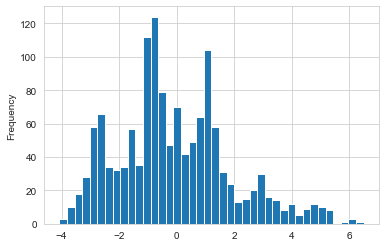

In [85]:
error.plot(kind='hist',bins=40)

### Gradient Boosting<a id='1.5.2_Gradient_Boosting'></a>

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=241)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)


for name, importance in zip(X_train.columns, gbr.feature_importances_):
    print(name, "=", importance)

budget = 0.12177891762657504
original_language = 0.003946963525929907
popularity = 0.06300742322448041
revenue = 0.10078005531075081
runtime = 0.14020753431229205
vote_average = 0.0983322835635597
vote_count = 0.10979986632322085
year = 0.08189840018213995
day = 0.09930782616651736
month = 0.019839448114927927
num_genres = 0.030429877362511387
production_companies_['Paramount Pictures'] = 0.011548452107504503
production_companies_['Universal Pictures'] = 0.0014981175041701082
production_companies_['PolyGram Filmed Entertainment', 'Warner Bros.'] = 0.005620917584087737
production_companies_['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions'] = 0.0
production_companies_['Paramount Pictures', 'The Coppola Company', 'The Directors Company'] = 0.0
production_companies_['United Artists', 'Star Partners II Ltd.'] = 0.0
production_companies_['TriStar Pictures'] = 0.0261319215

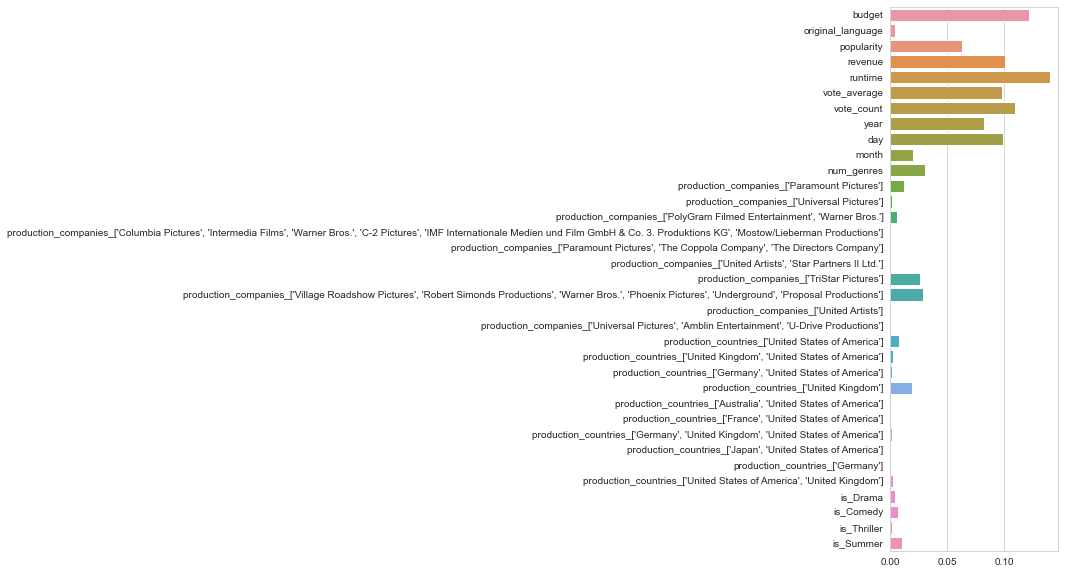

In [87]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,10))
sns.barplot(x=gbr.feature_importances_, y=X.columns)

In [88]:
ypred_gbr = gbr.predict(X_test)

In [89]:
evc_gbr= explained_variance_score(y_test, ypred_gbr)
print("The explained variance score of this model is: ", evc_gbr)

mae_gbr = mean_absolute_error(y_test, ypred_gbr)
print("The mean absolute error of this model is: ", mae_gbr)

mse_gbr = mean_squared_error(y_test, ypred_gbr)
print("The mean squared error of this model is: ", mse_gbr)

msle_gbr = mean_squared_log_error(y_test, ypred_gbr)
print("The mean squared log error of this model is: ",msle_gbr)

med_gbr = median_absolute_error(y_test, ypred_gbr)
print("the median absolute error of this model is: ", med_gbr)

r2_gbr = r2_score(y_test, ypred_gbr, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_gbr)

The explained variance score of this model is:  0.06958407209029249
The mean absolute error of this model is:  1.6091877664129983
The mean squared error of this model is:  4.008257670863142
The mean squared log error of this model is:  0.0909474326472534
the median absolute error of this model is:  1.1882132362090831
The r2 score of this model is:  0.0659563229108946


In [90]:
scores_gbr = cross_val_score(gbr, X, y, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse_gbr = np.mean(np.sqrt(np.abs(scores_gbr)))
print("Final RMSE: ", final_avg_rmse_gbr)

Final RMSE:  2.0306449460175138


In [91]:
rmse_gb = np.sqrt(mean_squared_error(y_test, ypred_gbr))
print('RMSE for GB: %f' % (rmse_gb))

RMSE for GB: 2.002063


#### Hyperparamter Tuning GB<a id='1.5.2.1_Hyperparameter_Tuning_GB'></a>

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV

random_grid = {'learning_rate': [0.001,0.01,0.10,0.20],
               'n_estimators': [50,100,300],
               'max_depth': [5,10,20],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4] }
gcv_random = RandomizedSearchCV(GradientBoostingRegressor(),random_grid,n_iter=100,cv=5,verbose=1,random_state=241,n_jobs=-1)
gcv_random.fit(X_train,y_train)

#gcv = GridSearchCV(GradientBoostingRegressor(),param_grid= params, scoring = 'neg_mean_squared_error', cv=5, verbose=1,n_jobs=-1)
#gcv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.1min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 300]},
                   random_state=241, verbose=1)

In [93]:
print("Best parameters: ", gcv_random.best_params_)
print("lowest RMSE found: ", np.sqrt(np.abs(gcv_random.best_score_)))

Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.01}
lowest RMSE found:  0.24235570309014368


In [94]:
ygcv_pred = gcv_random.predict(X_test)

In [95]:
evc_gcv= explained_variance_score(y_test, ygcv_pred)
print("The explained variance score of this model is: ", evc_gcv)

mae_gcv = mean_absolute_error(y_test, ygcv_pred)
print("The mean absolute error of this model is: ", mae_gcv)

mse_gcv = mean_squared_error(y_test, ygcv_pred)
print("The mean squared error of this model is: ", mse_gcv)

msle_gcv = mean_squared_log_error(y_test, ygcv_pred)
print("The mean squared log error of this model is: ",msle_gcv)

med_gcv = median_absolute_error(y_test, ygcv_pred)
print("the median absolute error of this model is: ", med_gcv)

r2_gcv= r2_score(y_test, ygcv_pred, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_gcv)

The explained variance score of this model is:  0.07501268734806155
The mean absolute error of this model is:  1.5986478853524906
The mean squared error of this model is:  3.985478187957739
The mean squared log error of this model is:  0.09039191148066261
the median absolute error of this model is:  1.1728034085381314
The r2 score of this model is:  0.07126462235726483


In [96]:
rmse_gb_tuned = np.sqrt(mean_squared_error(y_test, ygcv_pred))
print('RMSE for tuned GB: %f' % (rmse_gb_tuned))

RMSE for tuned GB: 1.996366


In [97]:
gcv_random.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__alpha', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__init', 'estimator__learning_rate', 'estimator__loss', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_iter_no_change', 'estimator__presort', 'estimator__random_state', 'estimator__subsample', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'iid', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])

### XGBoost<a id='1.5.3_XGBoost'></a>

In [98]:
import re
import xgboost as xgb
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns= [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=241)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [99]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
untuned_params={"objective":"reg:squarederror"}
rmse = xgb.cv(dtrain=housing_dmatrix,params=untuned_params,nfold=4,metrics="rmse",as_pandas=True,seed=123)
print("Untuned rmse: %f" %((rmse["test-rmse-mean"]).tail(1)))

Untuned rmse: 2.058361


In [100]:
for name, importance in zip(X_train.columns, xg_reg.feature_importances_):
    print(name, "=", importance)

budget = 0.012396638
original_language = 0.0081109125
popularity = 0.013836468
revenue = 0.016889378
runtime = 0.021766556
vote_average = 0.028204689
vote_count = 0.021937711
year = 0.021961957
day = 0.024218755
month = 0.023075163
num_genres = 0.02437647
production_companies__'Paramount Pictures'_ = 0.041221503
production_companies__'Universal Pictures'_ = 0.038117014
production_companies__'PolyGram Filmed Entertainment', 'Warner Bros.'_ = 0.09865876
production_companies__'Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions'_ = 0.0
production_companies__'Paramount Pictures', 'The Coppola Company', 'The Directors Company'_ = 0.013257172
production_companies__'United Artists', 'Star Partners II Ltd.'_ = 0.0
production_companies__'TriStar Pictures'_ = 0.10384133
production_companies__'Village Roadshow Pictures', 'Robert Simonds Productions', 'Warner Bros.', 'Phoenix Pictur

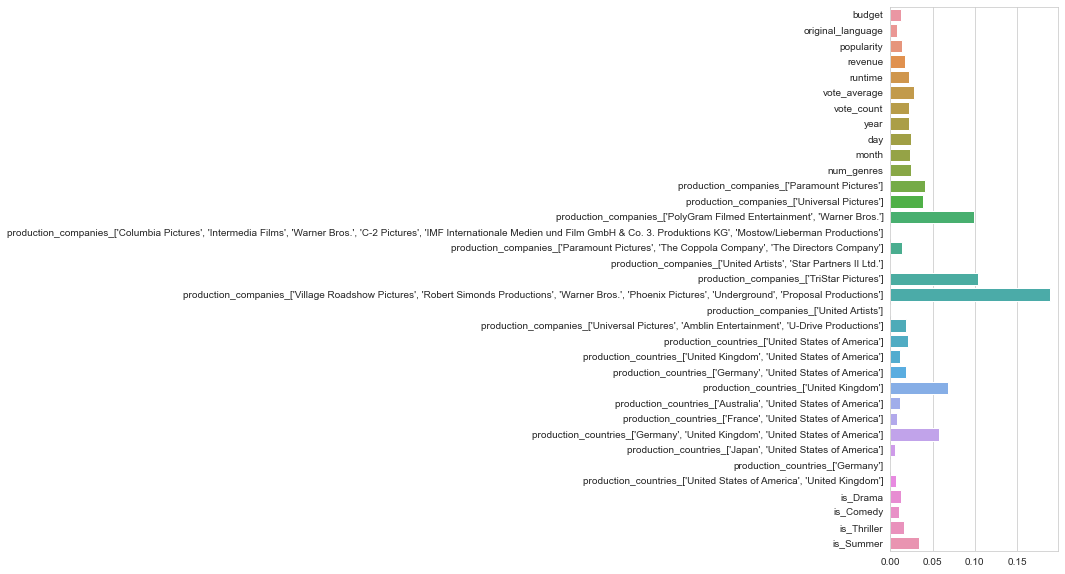

In [101]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,10))
sns.barplot(x=xg_reg.feature_importances_, y=X.columns)

In [102]:
evc_xgb = explained_variance_score(y_test, preds)
print("The explained variance score of this model is: ", evc_xgb)

mae_xgb = mean_absolute_error(y_test, preds)
print("The mean absolute error of this model is: ", mae_xgb)

mse_xgb = mean_squared_error(y_test, preds)
print("The mean squared error of this model is: ", mse_xgb)

msle_xgb = mean_squared_log_error(y_test, preds)
print("The mean squared log error of this model is: ",msle_xgb)

med_xgb = median_absolute_error(y_test, preds)
print("the median absolute error of this model is: ", med_xgb)

r2_xgb = r2_score(y_test, preds, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_xgb)

The explained variance score of this model is:  0.02749345862384789
The mean absolute error of this model is:  1.5980797758144616
The mean squared error of this model is:  4.180956642232009
The mean squared log error of this model is:  0.09347976005112514
the median absolute error of this model is:  1.276376724243164
The r2 score of this model is:  0.02571230780690914


In [103]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE for XGB: %f' % (rmse_xgb))

RMSE for XGB: 2.044739


#### Hyperparameter Tuning XGB<a id='1.5.3.1_Hyperparameter_Tuning_XGB'></a>

In [104]:
movies_dmatrix = xgb.DMatrix(data = X_train, label = y_train)
xgbparam_grid = { 'learning_rate': [0.01, 0.05, 0.1, 0.9],
                  'n_estimators':[50,100,500],
                  'subsample': [0.01, 0.10, 0.50], 
                  'max_depth': [5,10,20],
                  'min_child_weight': range(1,6,2)
                }
gbm = xgb.XGBRegressor()
random_mse = RandomizedSearchCV(estimator=gbm, param_distributions= xgbparam_grid,n_iter=100, 
                                scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
random_mse.fit(X_train, y_train)
print('Best parameters found: ',random_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(random_mse.best_score_)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.7min finished


Best parameters found:  {'subsample': 0.5, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05}
Lowest RMSE found:  2.036020435220053


In [105]:
xgb_preds = random_mse.predict(X_test)

In [106]:
evc_xgb_t = explained_variance_score(y_test, xgb_preds)
print("The explained variance score of this model is: ", evc_xgb_t)

mae_xgb_t = mean_absolute_error(y_test, xgb_preds)
print("The mean absolute error of this model is: ", mae_xgb_t)

mse_xgb_t = mean_squared_error(y_test, xgb_preds)
print("The mean squared error of this model is: ", mse_xgb_t)

msle_xgb_t = mean_squared_log_error(y_test, xgb_preds)
print("The mean squared log error of this model is: ",msle_xgb_t)

med_xgb_t = median_absolute_error(y_test, xgb_preds)
print("the median absolute error of this model is: ", med_xgb_t)

r2_xgb_t = r2_score(y_test, xgb_preds, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_xgb_t)

The explained variance score of this model is:  0.08444096091108211
The mean absolute error of this model is:  1.5949360536614703
The mean squared error of this model is:  3.9553860863260084
The mean squared log error of this model is:  0.08909542485987212
the median absolute error of this model is:  1.2417716979980469
The r2 score of this model is:  0.07827698023629004


In [107]:
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, xgb_preds))
print('RMSE for tuned XGB: %f' % (rmse_xgb_tuned))

RMSE for tuned XGB: 1.988815


In [108]:
scores_rf = cross_val_score(rf_random, X, y, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse_rf = np.mean(np.sqrt(np.abs(scores_rf)))
print("Final RMSE: ", final_avg_rmse_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\sathw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 10.8min finished
C:\Users\sathw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 10.1min finished
C:\Users\sathw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 12.5min finished
C:\Users\sathw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 10.0min finished
C:\Users\sathw\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 11.9min finished


Final RMSE:  2.0068932107229207


In [109]:
scores_gcv = cross_val_score(gcv_random, X, y, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse_gcv = np.mean(np.sqrt(np.abs(scores_gcv)))
print("Final RMSE: ", final_avg_rmse_gcv)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 17.0min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.8min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.2min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.0min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.0min finished


Final RMSE:  2.0163332219172085


In [110]:
#X = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
scores_xgb = cross_val_score(random_mse, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse_xgb = np.mean(np.sqrt(np.abs(scores_xgb)))
print("Final RMSE: ", final_avg_rmse_xgb)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.6min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.6min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.4min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.7min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.3min finished


Final RMSE:  2.034293157665843
